<a href="https://colab.research.google.com/github/knc6/jarvis/blob/master/jarvis/colab/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Write your own linear-regression model from scratch

In [0]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/mubaris/potential-enigma/master/headbrain.csv')

In [0]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [0]:
# Source: https://github.com/mubaris/potential-enigma/blob/master/simple_linear_regression_from_scratch.py
# https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72
# https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent

## Ordinary Least Mean Square Method

Coefficients
0.26342933948939945 325.57342104944223


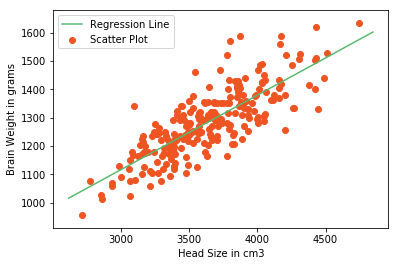

RMSE
72.1206213783709
R2 Score
0.6393117199570003


In [0]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("Coefficients")
print(b1, b0)

# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE")
print(rmse)

# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

## Gradient descent method

In [0]:
x = (X - X.mean()) / X.std()
x = np.c_[np.ones(x.shape[0]), x] 
y = Y

In [0]:
#GRADIENT DESCENT
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [0]:
#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 1282.87, 96.02


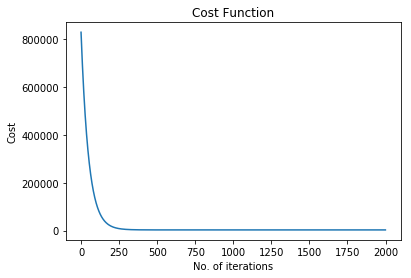

In [0]:
#Plot the cost function...
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()